# 00. Intro

Through **[BeatfulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)**, parse historical finance data of Korean companies(#45).   

With **[pandas](https://pandas.pydata.org)** & **[plotly](https://plot.ly/python/)**, refine the data and plot a graph of it for easy understanding.   

Finally, with **[affinity clustering](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AffinityPropagation.html)** from **[scikit-learn](http://scikit-learn.org/stable/)**,  
we show that the financial data trend of each company can grasp the **_"relation & tendency among companies"_**.

---

### Contents

**1. Parse Historical Finance Data with BeatfulSoup**

**2. Show Historical Finance Data**

**3. Clustering**

---

### setting the envirinment

- **[requirements.txt](https://github.com/jhyun0919/skku_python_proj/blob/master/codes/requirements.txt)**

```
$ pip install -r requirements.txt
```

---

# 01. Parse Historical Finance Data with BeatifulSoup

###  01_01. parse historical finance data @ [NAVER 금융](http://finance.naver.com) 

In [1]:
from financeDataParser import FinanceDataParser

- **src: [financeDataParser.py](https://github.com/jhyun0919/skku_python_proj/blob/master/codes/financeDataParser.py)**

In [2]:
parser = FinanceDataParser()

 - **e.g. [삼성전자(보통주) 일별 시세 주소](http://finance.naver.com/item/sise_day.nhn?code=005930)**

In [3]:
quotes = parser.quotes_historical_finance(start_date='2016.02.01')

> parsing historical finance data
	- index_num : 0.	fetching quote history of "두산"
	- index_num : 1.	fetching quote history of "기아차"
	- index_num : 2.	fetching quote history of "sk하이닉스"
	- index_num : 3.	fetching quote history of "한화"
	- index_num : 4.	fetching quote history of "CJ"
	- index_num : 5.	fetching quote history of "대한항공"
	- index_num : 6.	fetching quote history of "현대제철"
	- index_num : 7.	fetching quote history of "신세계"
	- index_num : 8.	fetching quote history of "효성"
	- index_num : 9.	fetching quote history of "현대차"
	- index_num : 10.	fetching quote history of "삼성전자"
	- index_num : 11.	fetching quote history of "오뚜기"
	- index_num : 12.	fetching quote history of "호텔신라"
	- index_num : 13.	fetching quote history of "현대중공업"
	- index_num : 14.	fetching quote history of "한화케미칼"
	- index_num : 15.	fetching quote history of "삼성중공업"
	- index_num : 16.	fetching quote history of "S오일"
	- index_num : 17.	fetching quote history of "SKT"
	- index_num : 18.	fetching quote history of "아시아

###  01_02. check the parsed finance historial data

In [4]:
quotes

array([[ (datetime.date(2017, 12, 12),  125000.,  126000.,  124000.,  125000.,    16350.),
        (datetime.date(2017, 12, 11),  123500.,  126000.,  123500.,  126000.,    20553.),
        (datetime.date(2017, 12, 8),  126500.,  127500.,  123500.,  124500.,    25373.),
        ...,
        (datetime.date(2016, 2, 3),   74500.,   74500.,   72100.,   72400.,   117697.),
        (datetime.date(2016, 2, 2),   75800.,   76800.,   74600.,   75000.,    58731.),
        (datetime.date(2016, 2, 1),   75000.,   76800.,   73900.,   76300.,   110423.)],
       [ (datetime.date(2017, 12, 12),   32050.,   32700.,   32050.,   32700.,   666921.),
        (datetime.date(2017, 12, 11),   33000.,   33050.,   32000.,   32450.,  1407108.),
        (datetime.date(2017, 12, 8),   33200.,   33450.,   32600.,   33000.,  1038301.),
        ...,
        (datetime.date(2016, 2, 3),   43350.,   43600.,   42650.,   43550.,  1342543.),
        (datetime.date(2016, 2, 2),   43950.,   44350.,   43150.,   43150.,  1677

#### assign a value for index number ( n-th company )

In [5]:
index_num = 11

#### check "index_num"-th company's finance historical data

In [6]:
q = quotes[index_num]
q[:10]

array([ (datetime.date(2017, 12, 12),  785000.,  795000.,  781000.,  792000.,  2944.),
       (datetime.date(2017, 12, 11),  776000.,  792000.,  776000.,  791000.,  2209.),
       (datetime.date(2017, 12, 8),  798000.,  804000.,  775000.,  778000.,  6349.),
       (datetime.date(2017, 12, 7),  796000.,  805000.,  794000.,  800000.,  4749.),
       (datetime.date(2017, 12, 6),  819000.,  820000.,  793000.,  795000.,  5298.),
       (datetime.date(2017, 12, 5),  794000.,  820000.,  793000.,  820000.,  7556.),
       (datetime.date(2017, 12, 4),  791000.,  807000.,  785000.,  792000.,  5899.),
       (datetime.date(2017, 12, 1),  794000.,  797000.,  783000.,  791000.,  4244.),
       (datetime.date(2017, 11, 30),  818000.,  818000.,  794000.,  794000.,  7751.),
       (datetime.date(2017, 11, 29),  828000.,  828000.,  808000.,  809000.,  4559.)],
      dtype=[('date', 'O'), ('open', '<f4'), ('high', '<f4'), ('low', '<f4'), ('close', '<f4'), ('volume', '<f4')])

#### check the data of each column's 

In [7]:
q['date'][:10]

array([datetime.date(2017, 12, 12), datetime.date(2017, 12, 11),
       datetime.date(2017, 12, 8), datetime.date(2017, 12, 7),
       datetime.date(2017, 12, 6), datetime.date(2017, 12, 5),
       datetime.date(2017, 12, 4), datetime.date(2017, 12, 1),
       datetime.date(2017, 11, 30), datetime.date(2017, 11, 29)], dtype=object)

In [8]:
q['open'][:10]

array([ 785000.,  776000.,  798000.,  796000.,  819000.,  794000.,
        791000.,  794000.,  818000.,  828000.], dtype=float32)

In [9]:
q['high'][:10]

array([ 795000.,  792000.,  804000.,  805000.,  820000.,  820000.,
        807000.,  797000.,  818000.,  828000.], dtype=float32)

In [10]:
q['low'][:10]

array([ 781000.,  776000.,  775000.,  794000.,  793000.,  793000.,
        785000.,  783000.,  794000.,  808000.], dtype=float32)

In [11]:
q['close'][:10]

array([ 792000.,  791000.,  778000.,  800000.,  795000.,  820000.,
        792000.,  791000.,  794000.,  809000.], dtype=float32)

In [12]:
q['volume'][:10]

array([ 2944.,  2209.,  6349.,  4749.,  5298.,  7556.,  5899.,  4244.,
        7751.,  4559.], dtype=float32)

---

# 02. Show Historical Finance Data

In [13]:
from dataDecorator import DataDecorator

- **src: [dataDecorator.py](https://github.com/jhyun0919/skku_python_proj/blob/master/codes/dataDecorator.py)**

### 02_01. pandas dataframe

In [14]:
names = parser.get_stock_names()
stock_items = parser.get_stock_items()

In [15]:
print('stock_name : {name}'.format(name=names[index_num]))
print('stock_item : {stock_item}'.format(stock_item=stock_items[index_num]))

stock_name : 오뚜기
stock_item : 007310


In [16]:
df = DataDecorator.set_dataframe(idx=index_num, quotes=quotes)

In [17]:
df

,close_prices,open_prices,high_prices,low_prices,volume
market_dates,,,,,
2016-02-01,1384000.0,1414000.0,1425000.0,1360000.0,8577.0
2016-02-02,1409000.0,1361000.0,1423000.0,1361000.0,6317.0
2016-02-03,1410000.0,1408000.0,1433000.0,1398000.0,4121.0
2016-02-04,1381000.0,1416000.0,1418000.0,1380000.0,5039.0
2016-02-05,1259000.0,1381000.0,1381000.0,1254000.0,18153.0
2016-02-11,1242000.0,1250000.0,1263000.0,1230000.0,7384.0
2016-02-12,1180000.0,1230000.0,1240000.0,1142000.0,11311.0
2016-02-15,1274000.0,1198000.0,1279000.0,1195000.0,9462.0
2016-02-16,1298000.0,1263000.0,1323000.0,1263000.0,6873.0


---

### 02_02. plotly candlestick-graph

### a) show interactive graph

In [18]:
from plotly.offline import download_plotlyjs, init_notebook_mode
import plotly.plotly as py

init_notebook_mode(connected=True)
fig = DataDecorator.set_candelstick_data(df=df, name=names[index_num], stock_item=stock_items[index_num])
py.iplot(fig, filename='candlestick')

- **link: [candlestick-graph](https://plot.ly/~JiHyunPark/5/_007310/)**

### b) save as a static image

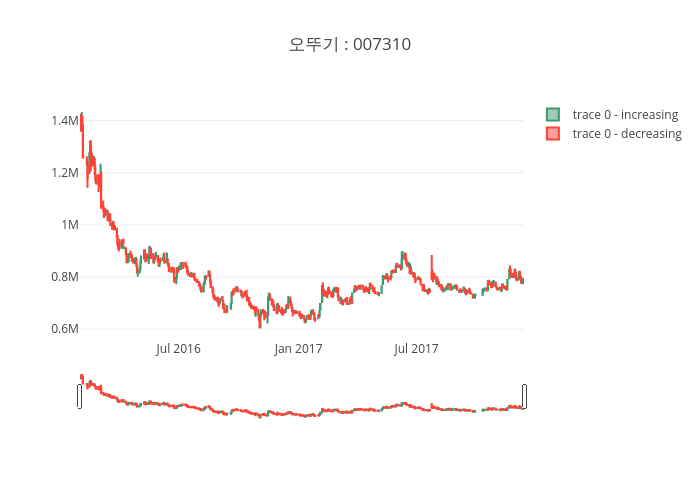

In [19]:
py.image.save_as(fig, filename='./fig/candlestick.png')
from IPython.display import Image
Image('./fig/candlestick.png', width=1300, height=900)

---

# 03. Clustering

In [20]:
from cluster import Cluster
import numpy as np

- **src: [cluster.py](https://github.com/jhyun0919/skku_python_proj/blob/master/codes/cluster.py)**
- **src: [dataDecorator.py](https://github.com/jhyun0919/skku_python_proj/blob/master/codes/dataDecorator.py)**

### 03_01. set clusters with _affinity propagation_

In [21]:
edge_model, embedding, names, n_labels, labels = Cluster.affinity(quotes=quotes)

Cluster 1: 기아차, 현대차, 삼성중공업
Cluster 2: sk하이닉스, 삼성전자, LG디스플레이, 카카오
Cluster 3: 대한항공, 아시아나항공
Cluster 4: 신세계, 호텔신라, 현대백화점, 하이마트, 이마트
Cluster 5: 현대중공업, 대우조선해양
Cluster 6: 두산, 한화, 효성, 한화케미칼, LG화학
Cluster 7: 현대제철, S오일, SK, LG전자, sk이노베이션
Cluster 8: SKT, KT, LG유플러스
Cluster 9: JYP엔터, ncsoft, 한국한공우주, 셀트리온, 셀트리온제약
Cluster 10: sm엔터, LG생활건강, 아모레퍼시픽
Cluster 11: CJ, 오뚜기, CJ제일제당
Cluster 12: 기업은행, 삼성카드, 네이버, 신한지주, KB금융


### 03_02. visualize the clusters

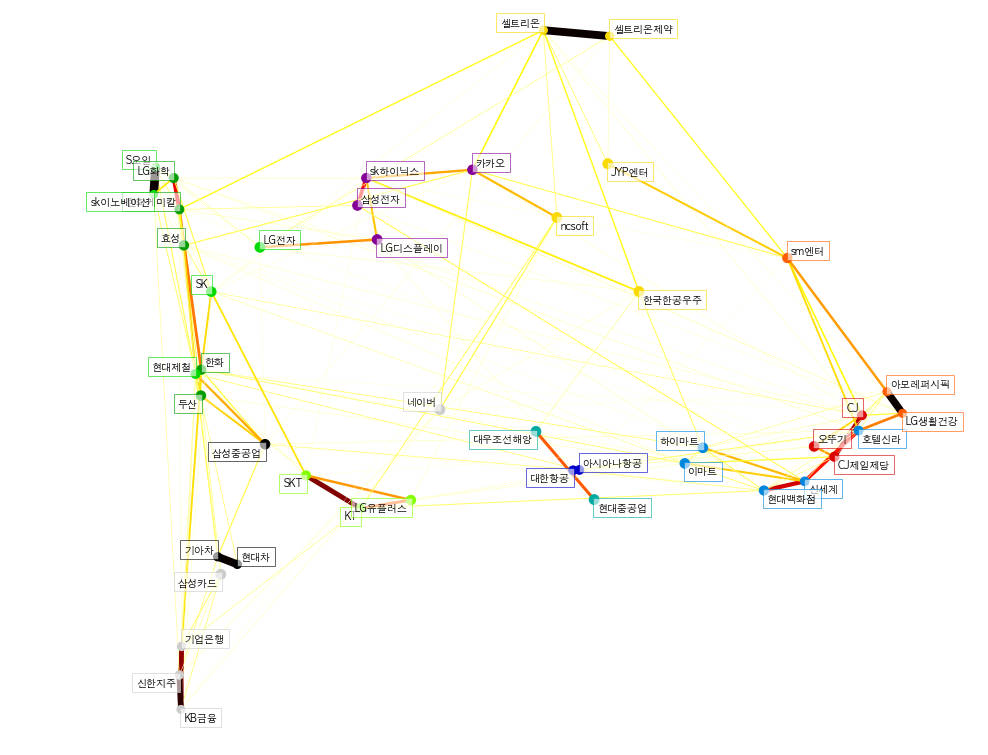

In [22]:
DataDecorator.show_cluster(edge_model, embedding, names, n_labels, labels)

---

# 04. Reference
* [NAVER를 통한 주식정보 크롤링 by Jaeyeon Baek](http://estenpark.tistory.com/353)
* [plotly : Candlestick-Chart](https://plot.ly/python/candlestick-charts/)
* [Visualizing the Stock Market Structure](http://scikit-learn.org/stable/auto_examples/applications/plot_stock_market.html)
